<a href="https://colab.research.google.com/github/Tinonturja/Deep-Learning-with-PyTorch/blob/main/Non_Linearity(Binary_and_MultiClass_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Recreating non-linear data(red and blue circles)

In [1]:
#import libraries
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn

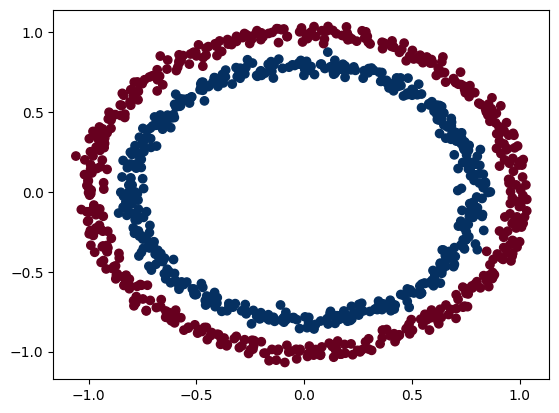

In [2]:
#make and plot data
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0],
            X[:,1],
            c = y,
            cmap = plt.cm.RdBu)

In [3]:
## Convert Data to Tensors and then to train and test splits
from sklearn.model_selection import train_test_split

#convert data to tensors
X = torch.tensor(X,dtype = torch.float32)
y = torch.tensor(y,dtype = torch.float32)
X.dtype, y.dtype


#split the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#view the shape
print(f"X_train shape: {X_train.shape} | X_train: \n{X_train[:5]}")
print(f"y_train shape: {y_train.shape} | y_train: \n{y_train[:5]}")
print(f"X_test shape: {X_test.shape} | X_test: \n{X_test[:5]}")
print(f"y_test shape: {y_test.shape} | y_test: \n{y_test[:5]}")


X_train shape: torch.Size([800, 2]) | X_train: 
tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        [-0.9666, -0.2256],
        [-0.1666,  0.7994]])
y_train shape: torch.Size([800]) | y_train: 
tensor([1., 0., 0., 0., 1.])
X_test shape: torch.Size([200, 2]) | X_test: 
tensor([[-0.3752,  0.6827],
        [ 0.0154,  0.9600],
        [-0.7028, -0.3147],
        [-0.2853,  0.9664],
        [ 0.4024, -0.7438]])
y_test shape: torch.Size([200]) | y_test: 
tensor([1., 0., 1., 0., 1.])


## Building a Model with Non-Linearity

In [4]:
# build a model
import torch.nn as nn

class ClassificationModelv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2,
                            out_features=10)
    self.layer2 = nn.Linear(in_features=10,
                            out_features=10)
    self.layer3 = nn.Linear(in_features=10,
                            out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))


In [5]:
#device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [6]:
#if cuda is setting up then you can be set up as
# model_3 = ClassificationModelv2().to(device)
model_3 = ClassificationModelv2()
model_3.to(device)

ClassificationModelv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [7]:
#accuracy calculation
def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item() #y_true and y_pred must be the same size, positional value check
  acc = ((correct)/len(y_pred)) * 100
  return acc

In [8]:
# setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

#optimizer set up
optimizer = torch.optim.SGD(params = model_3.parameters(),
                            lr = 0.1)

## Training a model with non linearity

In [9]:
torch.manual_seed(42)
X_train,y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

epochs = 5000
for epoch in range(epochs):
  model_3.train()
  train_pred = model_3(X_train.squeeze()).squeeze()
  train_labels = torch.round(torch.sigmoid(train_pred.squeeze()))
  train_accuracy = accuracy_fn(y_train,train_labels)
  train_loss = loss_fn(train_pred,y_train)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  #testing
  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test.squeeze()).squeeze()
    test_labels = torch.round(torch.sigmoid(test_pred.squeeze()))
    test_accuracy = accuracy_fn(y_test,test_labels)
    test_loss = loss_fn(test_pred,y_test)


  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Train_loss: {train_loss} | Train_Accuracy:{train_accuracy} | Test_loss: {test_loss} | Test_accuracy: {test_accuracy}")

Epoch: 0 | Train_loss: 0.6946709752082825 | Train_Accuracy:50.0 | Test_loss: 0.6957613229751587 | Test_accuracy: 50.0
Epoch: 10 | Train_loss: 0.691239595413208 | Train_Accuracy:49.625 | Test_loss: 0.6928004026412964 | Test_accuracy: 50.0
Epoch: 20 | Train_loss: 0.6900938153266907 | Train_Accuracy:49.75 | Test_loss: 0.6918032765388489 | Test_accuracy: 51.0
Epoch: 30 | Train_loss: 0.689561665058136 | Train_Accuracy:51.24999999999999 | Test_loss: 0.6913586258888245 | Test_accuracy: 51.0
Epoch: 40 | Train_loss: 0.6892085075378418 | Train_Accuracy:51.625 | Test_loss: 0.6910949349403381 | Test_accuracy: 49.0
Epoch: 50 | Train_loss: 0.6889092326164246 | Train_Accuracy:52.37500000000001 | Test_loss: 0.69089674949646 | Test_accuracy: 49.0
Epoch: 60 | Train_loss: 0.6886224150657654 | Train_Accuracy:52.37500000000001 | Test_loss: 0.6907216310501099 | Test_accuracy: 49.5
Epoch: 70 | Train_loss: 0.6883322596549988 | Train_Accuracy:52.625 | Test_loss: 0.6905457973480225 | Test_accuracy: 49.5
Epoch: 

In [10]:
## Visualization
##import the file
import requests
from pathlib import Path

#download helper_functions.py file
if Path('helper_functions.py').is_file():
  print('Helper functions already exists')
else:
  print("Downloading helper functions")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open(file="helper_functions.py",mode='wb') as f:
    f.write(request.content)


In [11]:
from helper_functions import plot_predictions, plot_decision_boundary

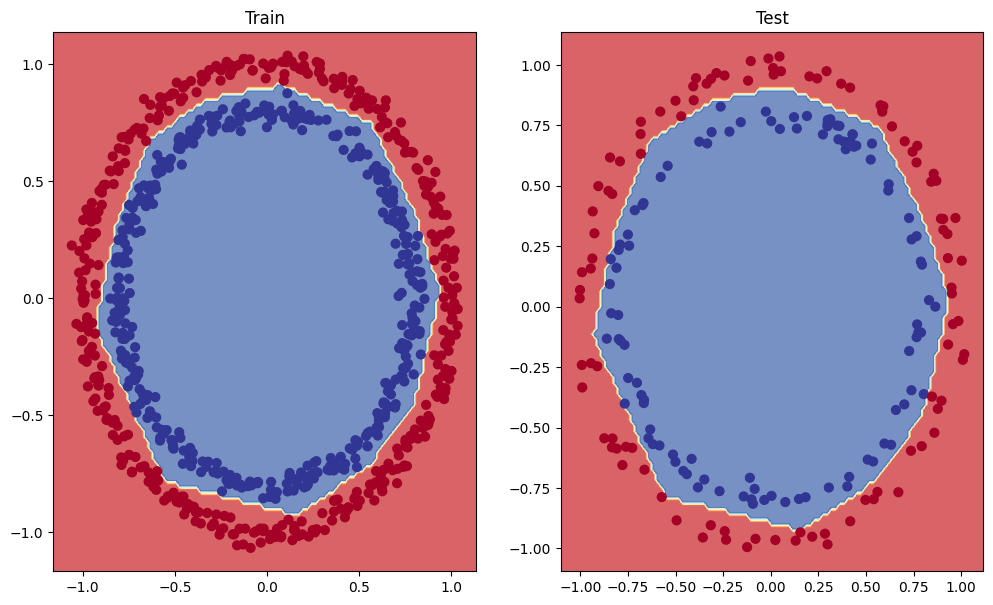

In [12]:
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

In [13]:
X_train.device,X_test.device,y_train.device,y_test.device

(device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0),
 device(type='cuda', index=0))

In [14]:
model_3.to(device)

ClassificationModelv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [15]:
model_3.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 2.6957, -1.9643],
                      [-0.0450,  0.2455],
                      [-1.7569, -0.9670],
                      [ 2.2176,  1.1927],
                      [-0.4068,  0.1457],
                      [-0.3787, -0.4750],
                      [-2.5830, -1.2698],
                      [-0.2655,  3.2568],
                      [-0.2263, -0.0069],
                      [ 0.2560,  0.3823]], device='cuda:0')),
             ('layer1.bias',
              tensor([-0.0507, -0.3486,  0.2780, -1.2353, -0.4637, -0.6379, -0.7741,  0.1539,
                      -0.5606,  2.7073], device='cuda:0')),
             ('layer2.weight',
              tensor([[ 1.5066,  0.1926,  0.8004,  1.6053, -0.2322, -0.1916,  1.3531,  1.7516,
                        0.1642, -1.1394],
                      [ 0.1938, -0.0588,  0.0110, -0.1543, -0.2217, -0.1391, -0.0732,  0.0112,
                        0.2712, -0.1412],
                      [-0.8460, -0.2502, 

## Replicating Non Linear Activation Funcitons

Neural Network, rather than telling us what to learn, we give it the tools to discover patterns in data
and find the patterns on its own

And these tools are linear and non_linear funcitons

In [16]:
# create a tensor
A = torch.arange(-10,10,1.00)


In [17]:
A.dtype

torch.float32

In [18]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

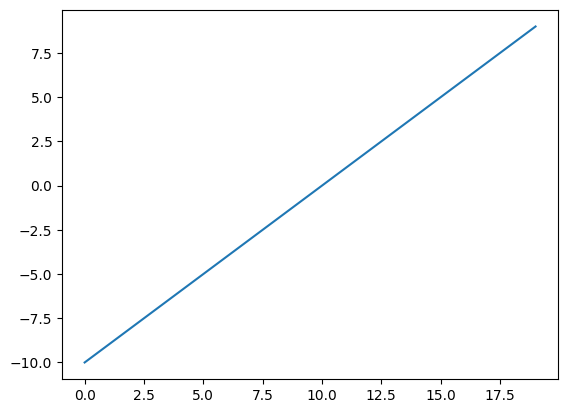

In [20]:
#visualize the data
plt.plot(A)

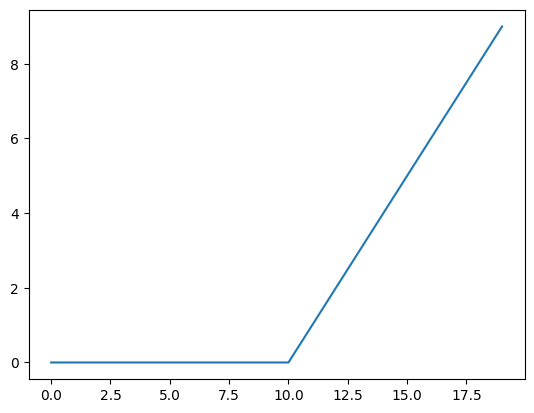

In [22]:
plt.plot(torch.relu(A))

In [37]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

In [38]:
rLU = relu(A)

In [40]:
rLU

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [50]:
#sigmoid function
def sigmoid(x:torch.tensor):
  return 1/(1+torch.exp(-x))

In [51]:
sigmoid = sigmoid(A)

In [52]:
sigmoid

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

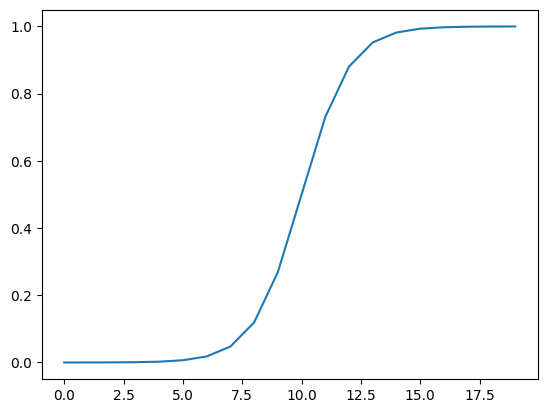

In [53]:
plt.plot(sigmoid)

In [41]:
 import numpy as np
X,y = np.meshgrid(torch.arange(-10,10,1),torch.arange(-10,10,1))

In [43]:
X.shape,y.shape

((20, 20), (20, 20))

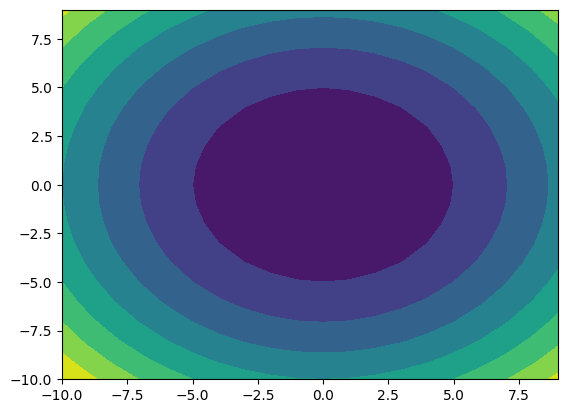

In [45]:
Z = X**2 + y**2  # A function over the grid
plt.contourf(X, y, Z)
plt.show()


## Putting it all together with a **MultiClass** Problem